In [3]:
import tensorflow as tf
import numpy as np 
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt

In [4]:
#chargement des datasest
data_f = open("data/tab_image.pickle","rb")
data_img = pickle.load(data_f)
data_img = np.array(data_img).reshape(-1,160,160,3)

data_img.shape #mijery isany col sy ligne sy canneaux

(34443, 160, 160, 3)

In [5]:
data_l = open("data/tab_labels.pickle","rb")
data_labels = pickle.load(data_l)
data_labels = np.array(data_labels)
data_labels.shape

(34443,)

In [6]:
#Diviser les tableaux en sous-ensembles de train et de test aléatoires
#parametre(array,array,test_sie float voir web,startify=appetaka le labels controlle le shuffle=>melange des donnes avant de le diviser)
(X_train,X_test,Y_train,Y_test) = train_test_split(data_img,data_labels,test_size=0.30, stratify=data_labels, random_state=42)

In [7]:
# (X_train,X_test,Y_train,Y_test) = train_test_split(data_img,data_labels,test_size=0.30, stratify=data_labels, random_state=42)
(X_train,X_val, Y_train, Y_val) = train_test_split(X_train,Y_train,test_size=0.10, random_state=1)

In [8]:
X_train.shape


(21699, 160, 160, 3)

In [9]:
X_train.shape[1:] #manala ny isany voloa


(160, 160, 3)

In [10]:



#filters: Entier, la dimensionnalité de l'espace de sortie (c'est-à-dire le nombre de filtres de sortie dans la convolution)
#kernel_size: Un entier ou tuple/liste de 2 entiers, spécifiant la hauteur et la largeur de la fenêtre de convolution 2D. Peut être un entier unique pour spécifier la même valeur pour toutes les dimensions spatiales
#padding: un de "valid"ou "same"(insensible à la casse). "valid"signifie pas de rembourrage. "same"entraîne un remplissage avec des zéros uniformément à gauche/droite ou haut/bas de l'entrée de sorte que la sortie a la même dimension hauteur/largeur que l'entrée.
#activation: Fonction d'activation à utiliser. Si vous ne spécifiez rien, aucune activation n'est appliquée
#normaliseza ilay mivoaka farany entre -1 et 1 & augmente l'accuracy du modele   applique une transformation qui maintient la sortie moyenne proche de 0 et l'écart type de sortie proche de 1
#normaliseza ilay mivoaka farany entre -1 et 1 & augmente l'accuracy du modele   applique une transformation qui maintient la sortie moyenne proche de 0 et l'écart type de sortie proche de 1

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(160,160,3) ,name="entree"))
model.add(tf.keras.layers.BatchNormalization()) 

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization()) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(2048, activation='relu'))
model.add(tf.keras.layers.Dense(2048, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(4, activation='softmax',name="sortie"))

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), #enarana
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
entree (Conv2D)              (None, 160, 160, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 160, 160, 32)      128       
_________________________________________________________________
conv2d (Conv2D)              (None, 160, 160, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 160, 160, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 80, 80, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 78, 78, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 78, 78, 128)       5

In [14]:
entrainement = model.fit(X_train, Y_train,validation_data=(X_val, Y_val), batch_size=64, epochs=10)

Epoch 1/10
340/340 [==============================] - 3869s 11s/step - loss: 0.0657 - accuracy: 0.9908 - val_loss: 7.4807e-04 - val_accuracy: 0.9996
Epoch 2/10
340/340 [==============================] - 3516s 10s/step - loss: 1.0508e-05 - accuracy: 1.0000 - val_loss: 1.1087e-05 - val_accuracy: 1.0000
Epoch 3/10
340/340 [==============================] - 3389s 10s/step - loss: 0.0309 - accuracy: 0.9983 - val_loss: 0.4533 - val_accuracy: 0.9863
Epoch 4/10
340/340 [==============================] - 3396s 10s/step - loss: 0.0419 - accuracy: 0.9985 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
340/340 [==============================] - 3400s 10s/step - loss: 1.0558e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
340/340 [==============================] - 3407s 10s/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
340/340 [==============================] - 3419s 10s/step - loss: 0.1274 - accuracy: 0.9982

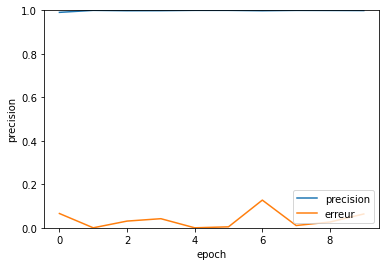

In [20]:
plt.plot(entrainement.history['accuracy'], label='precision') 
plt.plot(entrainement.history['loss'], label = 'erreur')
plt.xlabel('epoch') 
plt.ylabel('precision')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.savefig("graphe/graph.png")
plt.show()




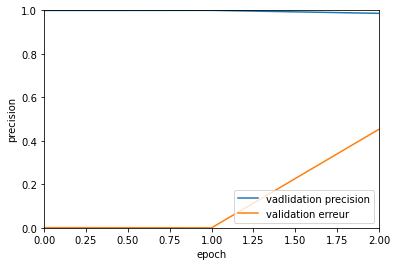

In [21]:
plt.plot(entrainement.history['val_accuracy'], label='vadlidation precision') 
plt.plot(entrainement.history['val_loss'], label = 'validation erreur')
plt.xlabel('epoch') 
plt.ylabel('precision')
plt.ylim([0, 1])
plt.xlim([0, 2])
plt.legend(loc='lower right')
plt.savefig("graphe/graphValidation.png")
plt.show()



In [23]:

model.save("model/epicerie.h5", save_format="h5")